<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/CV/2348546_Lab6_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, minimum_filter

In [2]:
image = cv2.imread('/content/tomjerry.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

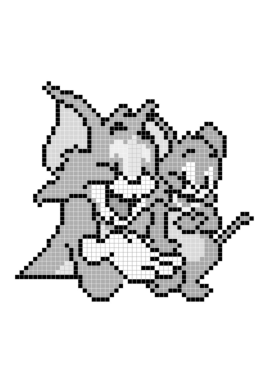

In [4]:
#Gray Image reading
gray= cv2.imread('/content/tomjerry.jpg',0)
plt.imshow(gray, 'gray')
plt.axis('off')
plt.show()

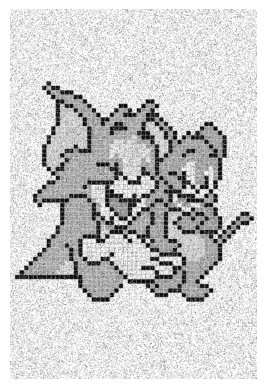

In [5]:
#Salt and pepper noise
salt_prob = 0.1
pepper_prob = 0.1
n_image = np.copy(gray)
salt_noise = np.random.rand(*gray.shape) < salt_prob
pepper_noise = np.random.rand(*gray.shape) < pepper_prob
n_image[salt_noise] = 255
n_image[pepper_noise] = 0

plt.imshow(n_image, 'gray')
plt.axis('off')
plt.show()

In [6]:
kernel_size = 3
#built-in function
median_image = cv2.medianBlur(n_image, kernel_size)

(<Axes: title={'center': 'Median Filtered Image'}>,
 Text(0.5, 1.0, 'Median Filtered Image'))

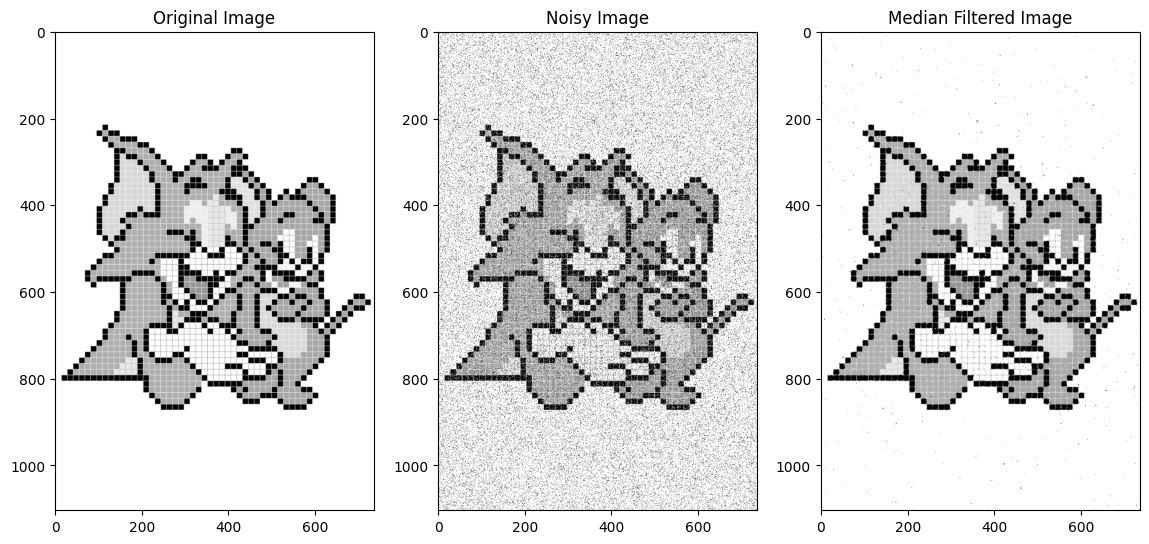

In [7]:
# displaying the original and filtered images
plt.figure(figsize=(14, 10))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(n_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 3, 3), plt.imshow(median_image, cmap='gray'), plt.title('Median Filtered Image')

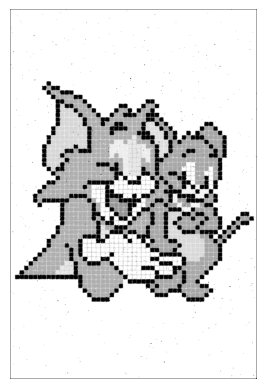

In [8]:
#noisy image ht and width
m, n = n_image.shape
median_img = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [n_image[i-1, j-1],
               n_image[i-1, j],
               n_image[i-1, j + 1],
               n_image[i, j-1],
               n_image[i, j],
               n_image[i, j + 1],
               n_image[i + 1, j-1],
               n_image[i + 1, j],
               n_image[i + 1, j + 1]]

        temp = sorted(temp)
        median_img[i, j]= temp[4]

median_img = median_img.astype(np.uint8)
plt.imshow(median_img, 'gray')
plt.axis('off')
plt.show()

In [9]:
#User-Defined
# displaying the original and filtered images
plt.figure(figsize=(14, 10))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(n_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 3, 3), plt.imshow(median_img, cmap='gray'), plt.title('Median Filtered Image')

(<Axes: title={'center': 'Median Filtered Image'}>,
 Text(0.5, 1.0, 'Median Filtered Image'))

Max and Min filters

In [10]:
#max-salt
#min-pepper
#middle-gaussian
#alpha trimmed-

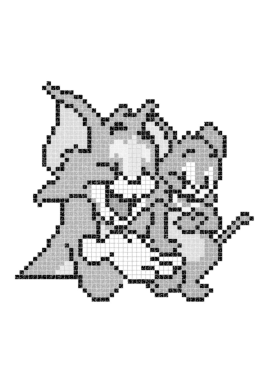

In [11]:
#Salt noise
ns_image = np.copy(gray)
salt_noise = np.random.rand(*gray.shape) < salt_prob
ns_image[salt_noise] = 255
plt.imshow(ns_image, 'gray')
plt.axis('off')
plt.show()

In [12]:
#Built in Max Filter
kernel_size=2
maxf_image = cv2.dilate(ns_image, kernel=np.ones((kernel_size, kernel_size), np.uint8))

In [13]:
def maxf_img(img, kernel_size):
    height, width = img.shape
    maxf_image = np.zeros_like(img)
    offset = kernel_size // 2
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            neighborhood = img[i-offset:i+offset+1, j-offset:j+offset+1]
            maxf_image[i, j] = np.max(neighborhood)
    return maxf_image
image_max = maxf_img(ns_image, kernel_size=2)

In [14]:
# displaying the original and filtered images
plt.figure(figsize=(14, 10))
plt.subplot(1, 4, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(ns_image, cmap='gray'), plt.title('Noisy Image-Salt')
plt.subplot(1, 4, 3), plt.imshow(maxf_image, cmap='gray'), plt.title('Max Filter Image(Built-in)')
plt.subplot(1, 4, 4), plt.imshow(image_max, cmap='gray'), plt.title('Max Filter Image(User-defined)')

(<Axes: title={'center': 'Max Filter Image(User-defined)'}>,
 Text(0.5, 1.0, 'Max Filter Image(User-defined)'))

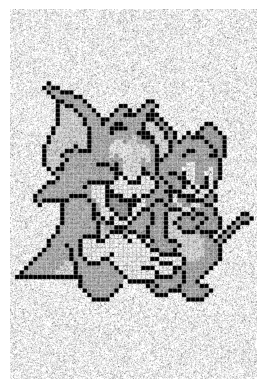

In [15]:
#pepper noise
np_image = np.copy(gray)
pepper_noise = np.random.rand(*gray.shape) < pepper_prob
np_image[pepper_noise] = 0
plt.imshow(np_image, 'gray')
plt.axis('off')
plt.show()

In [16]:
#built-in function Min filter
kernel_size = 2
# Min filter (erosion)
minf_image = cv2.erode(np_image, kernel=np.ones((kernel_size, kernel_size), np.uint8))

In [17]:
#user defined
def minf_img(image, kernel_size):
    height, width = image.shape
    minf_image = np.zeros_like(image)
    offset = kernel_size // 2
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            neighborhood = image[i-offset:i+offset+1, j-offset:j+offset+1]
            minf_image[i, j] = np.min(neighborhood)
    return minf_image
image_min = minf_img(np_image, kernel_size=2)

In [18]:
# displaying the original and filtered images
plt.figure(figsize=(14, 10))
plt.subplot(1, 4, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(np_image, cmap='gray'), plt.title('Noisy Image-Pepper')
plt.subplot(1, 4, 3), plt.imshow(minf_image, cmap='gray'), plt.title('Min Filtered Image(Built-in)')
plt.subplot(1, 4, 4), plt.imshow(image_min, cmap='gray'), plt.title('Min Filter Image(User-defined)')

(<Axes: title={'center': 'Min Filter Image(User-defined)'}>,
 Text(0.5, 1.0, 'Min Filter Image(User-defined)'))

Mid-point filter

In [19]:
#noisy image- gaussian noise
noise = np.random.normal(0, 10, gray.shape)
ng_image = gray + noise.astype(np.uint8)
plt.imshow(ng_image, 'gray')
plt.axis('off')
plt.show()

In [20]:
#user defined
def midpoint_filter(image, size):
    maxf = maximum_filter(image, size)
    minf = minimum_filter(image, size)
    return (maxf + minf) / 2
image_mid = midpoint_filter(ng_image, size=2)

In [21]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(ng_image, cmap='gray'), plt.title('Noisy Image-Gaussian')
plt.subplot(1, 3, 3), plt.imshow(image_mid, cmap='gray'), plt.title('Mid-point Filter Image(User defined)')

(<Axes: title={'center': 'Mid-point Filter Image(User defined)'}>,
 Text(0.5, 1.0, 'Mid-point Filter Image(User defined)'))

Alpha trimmed

In [22]:
def alpha_trim_filter(image, kernel_size, alpha):
    offset = kernel_size // 2
    image_atf = np.zeros_like(image)
    for i in range(offset, image.shape[0] - offset):
        for j in range(offset, image.shape[1] - offset):
            neighborhood = image[i-offset:i+offset+1, j-offset:j+offset+1]
            neighborhood_flat = neighborhood.flatten()
            sorted_neighborhood = np.sort(neighborhood_flat)
            trimmed_neighborhood = sorted_neighborhood[alpha:-alpha]
            image_atf[i, j] = np.mean(trimmed_neighborhood)
    return image_atf
image_atf = alpha_trim_filter(ng_image, kernel_size=5, alpha=2)

(<Axes: title={'center': 'Alpha trimmed Filter Image'}>,
 Text(0.5, 1.0, 'Alpha trimmed Filter Image'))

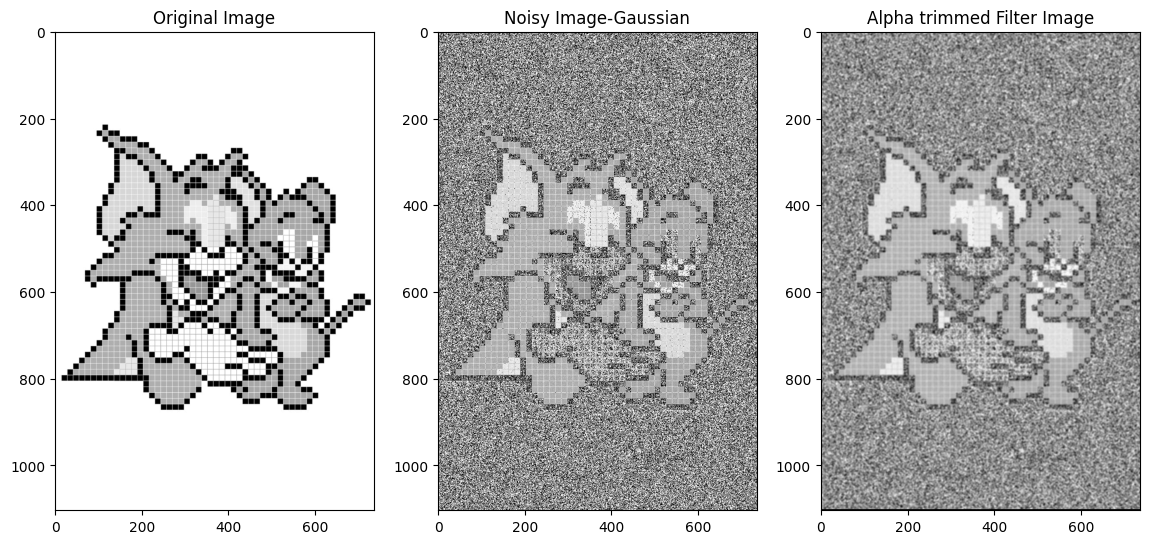

In [23]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(ng_image, cmap='gray'), plt.title('Noisy Image-Gaussian')
plt.subplot(1, 3, 3), plt.imshow(image_atf, cmap='gray'), plt.title('Alpha trimmed Filter Image')